


# Classification_CNN

## Method

Build Convolutional Neural Network model with Tensorflow-Keras.

```
X_train: 50000 samples
X_test: 10000 samples

batch_size: 128
epochs: 100
```

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

## Load dataset, Preprocessing

In [4]:
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Convolution2D, MaxPooling2D, Flatten, Dropout
from sklearn.metrics import accuracy_score

In [5]:
output_dim = nb_classes = 10
input_dim = (32,32,3)

In [6]:
print(X_train.shape, X_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
Y_train = utils.to_categorical(y_train, nb_classes)
Y_test = utils.to_categorical(y_test, nb_classes)

In [8]:
print(input_dim, X_train.shape, Y_train.shape, X_test.shape, Y_test.shape, output_dim)

(32, 32, 3) (50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10) 10


## Build Model

## arch2 Image augmentation 2

In [8]:
model = Sequential()

# 32,32
model.add(Convolution2D(16,(3,3), activation='relu', input_shape=(32,32,3), padding='same'))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(32,(3,3), activation='relu'))
model.add(BatchNormalization())

# 28,28
model.add(MaxPooling2D(pool_size=(2,2)))

# # 14,14
model.add(Convolution2D(24,1, activation='relu'))

# 14,14
model.add(Convolution2D(64,(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())

# 12, 12
model.add(Convolution2D(128,(3,3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64, 1, activation='relu'))

model.add(Convolution2D(256,(3,3), activation='relu'))
model.add(BatchNormalization())

model.add(Convolution2D(10, 4))

model.add(Flatten())
model.add(Activation('softmax'))


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 24)        792       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        1

In [10]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=10
)
batch_size = 128
model_info = model.fit_generator(
    datagen.flow(X_train, Y_train, batch_size=batch_size),
    steps_per_epoch=X_train.shape[0]//batch_size,
    epochs=50,
    validation_data=(X_test, Y_test),
)

Epoch 1/50
390/390 [==============================] - 110s 282ms/step - loss: 1.6119 - accuracy: 0.4441 - val_loss: 1.4521 - val_accuracy: 0.4957
Epoch 2/50
390/390 [==============================] - 105s 268ms/step - loss: 1.2059 - accuracy: 0.5808 - val_loss: 1.3732 - val_accuracy: 0.5247
Epoch 3/50
390/390 [==============================] - 105s 268ms/step - loss: 1.0441 - accuracy: 0.6366 - val_loss: 1.1833 - val_accuracy: 0.5946
Epoch 4/50
390/390 [==============================] - 105s 269ms/step - loss: 0.9469 - accuracy: 0.6712 - val_loss: 1.0639 - val_accuracy: 0.6416
Epoch 5/50
390/390 [==============================] - 104s 267ms/step - loss: 0.8679 - accuracy: 0.6947 - val_loss: 0.9902 - val_accuracy: 0.6664
Epoch 6/50
390/390 [==============================] - 104s 267ms/step - loss: 0.8096 - accuracy: 0.7175 - val_loss: 0.8953 - val_accuracy: 0.6920
Epoch 7/50
390/390 [==============================] - 104s 266ms/step - loss: 0.7628 - accuracy: 0.7358 - val_loss: 1.1121 -

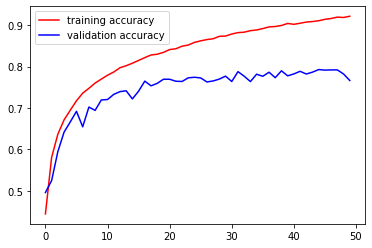

In [13]:
import matplotlib.pyplot as plt
plt.plot(model_info.history['accuracy'],'r')
plt.plot(model_info.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

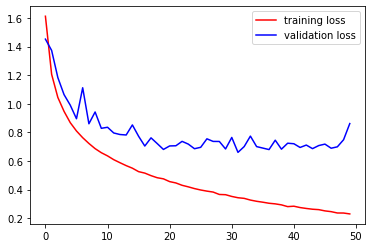

In [14]:
plt.plot(model_info.history['loss'],'r')
plt.plot(model_info.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [48]:
predictions = model.predict_classes(X_test)

## arch 4 - Image augmentation (4) && Dropout

In [17]:
model = Sequential()

# 32,32
model.add(Convolution2D(16,(3,3), activation='relu', input_shape=(32,32,3), padding='same'))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(32,(3,3), activation='relu'))
model.add(BatchNormalization())

# 28,28
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# # 14,14
model.add(Convolution2D(24,1, activation='relu'))

# 14,14
model.add(Convolution2D(64,(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())

# 12, 12
model.add(Convolution2D(128,(3,3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 1, activation='relu'))

model.add(Convolution2D(256,(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Convolution2D(10, 4))

model.add(Flatten())
model.add(Activation('softmax'))


In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 30, 30, 32)        4640      
_________________________________________________________________
batch_normalization_8 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 24)       

In [19]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.2
    
)
batch_size = 128
model_info = model.fit_generator(
    datagen.flow(X_train, Y_train, batch_size=batch_size),
    steps_per_epoch=X_train.shape[0]//batch_size,
    epochs=50,
    validation_data=(X_test, Y_test),
)

Epoch 1/50
390/390 [==============================] - 116s 298ms/step - loss: 2.1930 - accuracy: 0.2980 - val_loss: 1.7167 - val_accuracy: 0.4104
Epoch 2/50
390/390 [==============================] - 117s 299ms/step - loss: 1.8162 - accuracy: 0.4041 - val_loss: 1.5980 - val_accuracy: 0.4491
Epoch 3/50
390/390 [==============================] - 116s 298ms/step - loss: 1.6828 - accuracy: 0.4504 - val_loss: 1.6929 - val_accuracy: 0.4500
Epoch 4/50
390/390 [==============================] - 116s 298ms/step - loss: 1.6002 - accuracy: 0.4777 - val_loss: 1.5850 - val_accuracy: 0.4854
Epoch 5/50
390/390 [==============================] - 116s 299ms/step - loss: 1.5423 - accuracy: 0.4996 - val_loss: 1.2556 - val_accuracy: 0.5676
Epoch 6/50
390/390 [==============================] - 117s 299ms/step - loss: 1.4542 - accuracy: 0.5216 - val_loss: 1.4239 - val_accuracy: 0.5422
Epoch 7/50
390/390 [==============================] - 115s 295ms/step - loss: 1.4024 - accuracy: 0.5422 - val_loss: 1.3743 -

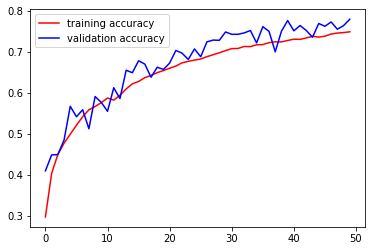

In [22]:
import matplotlib.pyplot as plt
plt.plot(model_info.history['accuracy'],'r')
plt.plot(model_info.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

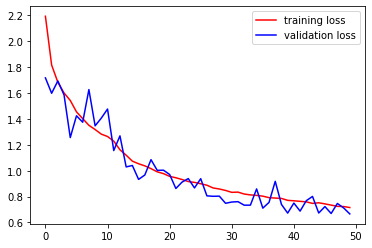

In [23]:
plt.plot(model_info.history['loss'],'r')
plt.plot(model_info.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [48]:
predictions = model.predict_classes(X_test)

## arch 4 - Image augmentation (4) && Dropout && L2 Regularization (0.1)

In [36]:
from tensorflow.keras import regularizers

In [37]:
model = Sequential()

# 32,32
model.add(Convolution2D(16,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.1), input_shape=(32,32,3), padding='same'))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(32,(3,3), activation='relu' , kernel_regularizer=regularizers.l2(0.1)))
model.add(BatchNormalization())

# 28,28
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# # 14,14
model.add(Convolution2D(24,1, activation='relu', kernel_regularizer=regularizers.l2(0.1)))

# 14,14
model.add(Convolution2D(64,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.1), padding='same'))
model.add(BatchNormalization())

# 12, 12
model.add(Convolution2D(128,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 1, activation='relu', kernel_regularizer=regularizers.l2(0.1)))

model.add(Convolution2D(256,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Convolution2D(10, 4, kernel_regularizer=regularizers.l2(0.1),))

model.add(Flatten())
model.add(Activation('softmax'))


In [38]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_27 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 30, 30, 32)        4640      
_________________________________________________________________
batch_normalization_28 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 15, 15, 24)       

In [39]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.2
    
)
batch_size = 128
model_info = model.fit_generator(
    datagen.flow(X_train, Y_train, batch_size=batch_size),
    steps_per_epoch=X_train.shape[0]//batch_size,
    epochs=50,
    validation_data=(X_test, Y_test),
)

Epoch 1/50
390/390 [==============================] - 121s 311ms/step - loss: 21.3552 - accuracy: 0.3314 - val_loss: 10.3848 - val_accuracy: 0.1602
Epoch 2/50
390/390 [==============================] - 121s 311ms/step - loss: 5.6396 - accuracy: 0.4761 - val_loss: 4.0488 - val_accuracy: 0.2072
Epoch 3/50
390/390 [==============================] - 121s 310ms/step - loss: 2.3755 - accuracy: 0.5370 - val_loss: 2.2571 - val_accuracy: 0.4216
Epoch 4/50
390/390 [==============================] - 121s 310ms/step - loss: 1.6831 - accuracy: 0.5685 - val_loss: 1.5993 - val_accuracy: 0.5699
Epoch 5/50
390/390 [==============================] - 121s 311ms/step - loss: 1.5206 - accuracy: 0.5850 - val_loss: 1.9179 - val_accuracy: 0.5019
Epoch 6/50
390/390 [==============================] - 120s 308ms/step - loss: 1.4715 - accuracy: 0.5985 - val_loss: 1.5979 - val_accuracy: 0.5821
Epoch 7/50
390/390 [==============================] - 122s 312ms/step - loss: 1.4469 - accuracy: 0.6058 - val_loss: 1.8486

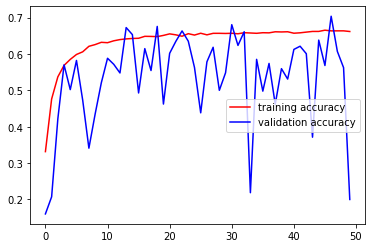

In [42]:
import matplotlib.pyplot as plt
plt.plot(model_info.history['accuracy'],'r')
plt.plot(model_info.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

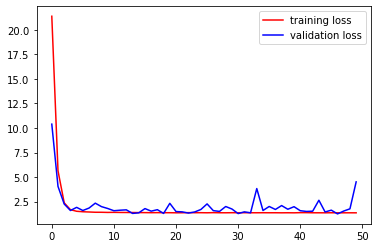

In [43]:
plt.plot(model_info.history['loss'],'r')
plt.plot(model_info.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [44]:
y_pred = model.predict_classes(X_test)

In [49]:
y_pred = model.predict_classes(X_test)
score = accuracy_score(y_test, y_pred)
score

0.1999

## arch 5 - Image augmentation (4) && Dropout && L2 Regularization (0.01)

In [36]:
from tensorflow.keras import regularizers

In [50]:
model = Sequential()

# 32,32
model.add(Convolution2D(16,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(32,32,3), padding='same'))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(32,(3,3), activation='relu' , kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())

# 28,28
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# # 14,14
model.add(Convolution2D(24,1, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# 14,14
model.add(Convolution2D(64,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.01), padding='same'))
model.add(BatchNormalization())

# 12, 12
model.add(Convolution2D(128,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 1, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

model.add(Convolution2D(256,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Convolution2D(10, 4, kernel_regularizer=regularizers.l2(0.01),))

model.add(Flatten())
model.add(Activation('softmax'))


In [51]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_32 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 30, 30, 32)        4640      
_________________________________________________________________
batch_normalization_33 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 15, 15, 24)       

In [52]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.2
    
)
batch_size = 128
model_info = model.fit_generator(
    datagen.flow(X_train, Y_train, batch_size=batch_size),
    steps_per_epoch=X_train.shape[0]//batch_size,
    epochs=50,
    validation_data=(X_test, Y_test),
)

Epoch 1/50
390/390 [==============================] - 122s 312ms/step - loss: 5.6566 - accuracy: 0.3072 - val_loss: 12.6401 - val_accuracy: 0.1254
Epoch 2/50
390/390 [==============================] - 121s 310ms/step - loss: 4.8213 - accuracy: 0.4056 - val_loss: 4.4028 - val_accuracy: 0.4340
Epoch 3/50
390/390 [==============================] - 121s 311ms/step - loss: 4.2032 - accuracy: 0.4603 - val_loss: 3.9347 - val_accuracy: 0.4481
Epoch 4/50
390/390 [==============================] - 121s 310ms/step - loss: 3.7435 - accuracy: 0.4946 - val_loss: 3.5143 - val_accuracy: 0.5029
Epoch 5/50
390/390 [==============================] - 122s 312ms/step - loss: 3.3342 - accuracy: 0.5253 - val_loss: 3.2926 - val_accuracy: 0.4837
Epoch 6/50
390/390 [==============================] - 121s 310ms/step - loss: 2.9886 - accuracy: 0.5472 - val_loss: 2.9254 - val_accuracy: 0.5250
Epoch 7/50
390/390 [==============================] - 121s 311ms/step - loss: 2.7015 - accuracy: 0.5663 - val_loss: 2.6074 

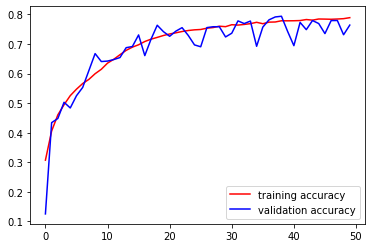

In [54]:
import matplotlib.pyplot as plt
plt.plot(model_info.history['accuracy'],'r')
plt.plot(model_info.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

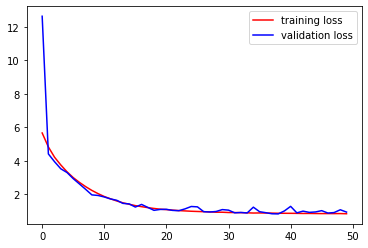

In [55]:
plt.plot(model_info.history['loss'],'r')
plt.plot(model_info.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

# ------

## arch 6 - Image augmentation (4) && Dropout && L2 Regularization (0.001)

In [36]:
from tensorflow.keras import regularizers

In [56]:
model = Sequential()

# 32,32
model.add(Convolution2D(16,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(32,32,3), padding='same'))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(32,(3,3), activation='relu' , kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())

# 28,28
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# # 14,14
model.add(Convolution2D(24,1, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# 14,14
model.add(Convolution2D(64,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001), padding='same'))
model.add(BatchNormalization())

# 12, 12
model.add(Convolution2D(128,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 1, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

model.add(Convolution2D(256,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Convolution2D(10, 4, kernel_regularizer=regularizers.l2(0.001),))

model.add(Flatten())
model.add(Activation('softmax'))


In [57]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_37 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 30, 30, 32)        4640      
_________________________________________________________________
batch_normalization_38 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 15, 15, 24)       

In [58]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [59]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.2
    
)
batch_size = 128
model_info = model.fit_generator(
    datagen.flow(X_train, Y_train, batch_size=batch_size),
    steps_per_epoch=X_train.shape[0]//batch_size,
    epochs=50,
    validation_data=(X_test, Y_test),
)

Epoch 1/50
390/390 [==============================] - 125s 322ms/step - loss: 2.5576 - accuracy: 0.3092 - val_loss: 2.1525 - val_accuracy: 0.3691
Epoch 2/50
390/390 [==============================] - 121s 311ms/step - loss: 2.1948 - accuracy: 0.4012 - val_loss: 2.0841 - val_accuracy: 0.4575
Epoch 3/50
390/390 [==============================] - 121s 309ms/step - loss: 2.0617 - accuracy: 0.4458 - val_loss: 2.0524 - val_accuracy: 0.4724
Epoch 4/50
390/390 [==============================] - 121s 311ms/step - loss: 1.9684 - accuracy: 0.4747 - val_loss: 1.8259 - val_accuracy: 0.5115
Epoch 5/50
390/390 [==============================] - 121s 311ms/step - loss: 1.8698 - accuracy: 0.5033 - val_loss: 1.6191 - val_accuracy: 0.5738
Epoch 6/50
390/390 [==============================] - 121s 311ms/step - loss: 1.7954 - accuracy: 0.5290 - val_loss: 1.8105 - val_accuracy: 0.5455
Epoch 7/50
390/390 [==============================] - 121s 310ms/step - loss: 1.7319 - accuracy: 0.5444 - val_loss: 1.6644 -

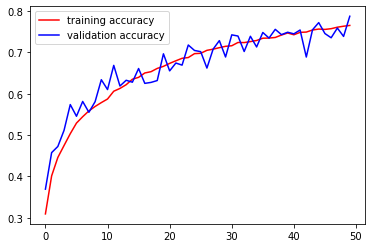

In [60]:
import matplotlib.pyplot as plt
plt.plot(model_info.history['accuracy'],'r')
plt.plot(model_info.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

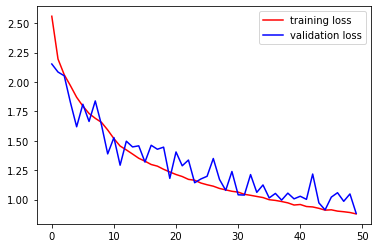

In [61]:
plt.plot(model_info.history['loss'],'r')
plt.plot(model_info.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [48]:
predictions = model.predict_classes(X_test)

## arch 7 - Image augmentation (4) && Dropout && L2 Regularization (0.0001)

In [62]:
from tensorflow.keras import regularizers

In [63]:
model = Sequential()

# 32,32
model.add(Convolution2D(16,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.0001), input_shape=(32,32,3), padding='same'))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(32,(3,3), activation='relu' , kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())

# 28,28
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# # 14,14
model.add(Convolution2D(24,1, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))

# 14,14
model.add(Convolution2D(64,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.0001), padding='same'))
model.add(BatchNormalization())

# 12, 12
model.add(Convolution2D(128,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 1, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))

model.add(Convolution2D(256,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Convolution2D(10, 4, kernel_regularizer=regularizers.l2(0.0001),))

model.add(Flatten())
model.add(Activation('softmax'))


In [64]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_42 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 30, 30, 32)        4640      
_________________________________________________________________
batch_normalization_43 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 15, 15, 24)       

In [65]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [66]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.2
    
)
batch_size = 128
model_info = model.fit_generator(
    datagen.flow(X_train, Y_train, batch_size=batch_size),
    steps_per_epoch=X_train.shape[0]//batch_size,
    epochs=50,
    validation_data=(X_test, Y_test),
)

Epoch 1/50
390/390 [==============================] - 119s 305ms/step - loss: 2.1651 - accuracy: 0.3109 - val_loss: 1.7186 - val_accuracy: 0.4208
Epoch 2/50
390/390 [==============================] - 120s 307ms/step - loss: 1.8696 - accuracy: 0.4052 - val_loss: 1.6801 - val_accuracy: 0.4815
Epoch 3/50
390/390 [==============================] - 120s 307ms/step - loss: 1.7434 - accuracy: 0.4442 - val_loss: 1.7516 - val_accuracy: 0.4924
Epoch 4/50
390/390 [==============================] - 120s 307ms/step - loss: 1.6565 - accuracy: 0.4750 - val_loss: 1.8401 - val_accuracy: 0.4678
Epoch 5/50
390/390 [==============================] - 120s 307ms/step - loss: 1.6153 - accuracy: 0.4878 - val_loss: 1.7922 - val_accuracy: 0.4787
Epoch 6/50
390/390 [==============================] - 119s 306ms/step - loss: 1.5112 - accuracy: 0.5182 - val_loss: 1.6863 - val_accuracy: 0.5013
Epoch 7/50
390/390 [==============================] - 120s 307ms/step - loss: 1.4560 - accuracy: 0.5390 - val_loss: 1.3049 -

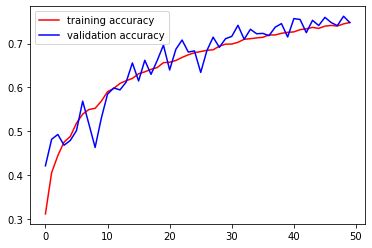

In [67]:
import matplotlib.pyplot as plt
plt.plot(model_info.history['accuracy'],'r')
plt.plot(model_info.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

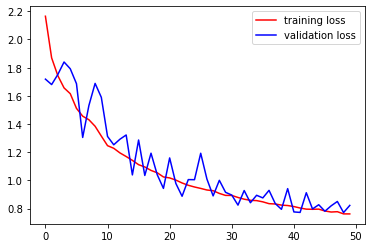

In [68]:
plt.plot(model_info.history['loss'],'r')
plt.plot(model_info.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

## arch 7 - Image augmentation (4) && Dropout && L2 Regularization (0.001) + 500epochs

In [69]:
from tensorflow.keras import regularizers

In [70]:
model = Sequential()

# 32,32
model.add(Convolution2D(16,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(32,32,3), padding='same'))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(32,(3,3), activation='relu' , kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())

# 28,28
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# # 14,14
model.add(Convolution2D(24,1, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# 14,14
model.add(Convolution2D(64,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001), padding='same'))
model.add(BatchNormalization())

# 12, 12
model.add(Convolution2D(128,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 1, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

model.add(Convolution2D(256,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Convolution2D(10, 4, kernel_regularizer=regularizers.l2(0.001),))

model.add(Flatten())
model.add(Activation('softmax'))


In [71]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_47 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 30, 30, 32)        4640      
_________________________________________________________________
batch_normalization_48 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 15, 15, 24)      

In [72]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [73]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.2
    
)
batch_size = 128
model_info = model.fit_generator(
    datagen.flow(X_train, Y_train, batch_size=batch_size),
    steps_per_epoch=X_train.shape[0]//batch_size,
    epochs=500,
    validation_data=(X_test, Y_test),
)

Epoch 1/500
390/390 [==============================] - 120s 307ms/step - loss: 2.5120 - accuracy: 0.3118 - val_loss: 2.0742 - val_accuracy: 0.4390
Epoch 2/500
390/390 [==============================] - 119s 306ms/step - loss: 2.1228 - accuracy: 0.4133 - val_loss: 2.0533 - val_accuracy: 0.4275
Epoch 3/500
390/390 [==============================] - 119s 306ms/step - loss: 1.9926 - accuracy: 0.4506 - val_loss: 1.8378 - val_accuracy: 0.4722
Epoch 4/500
390/390 [==============================] - 119s 306ms/step - loss: 1.9326 - accuracy: 0.4780 - val_loss: 1.9214 - val_accuracy: 0.4652
Epoch 5/500
390/390 [==============================] - 119s 306ms/step - loss: 1.8495 - accuracy: 0.5010 - val_loss: 1.7003 - val_accuracy: 0.5148
Epoch 6/500
390/390 [==============================] - 119s 305ms/step - loss: 1.7815 - accuracy: 0.5229 - val_loss: 1.6038 - val_accuracy: 0.5625
Epoch 7/500
390/390 [==============================] - 119s 306ms/step - loss: 1.7236 - accuracy: 0.5414 - val_loss: 1

390/390 [==============================] - 119s 304ms/step - loss: 0.6312 - accuracy: 0.8239 - val_loss: 0.6835 - val_accuracy: 0.8309
Epoch 112/500
390/390 [==============================] - 119s 304ms/step - loss: 0.6366 - accuracy: 0.8227 - val_loss: 0.7126 - val_accuracy: 0.8136
Epoch 113/500
390/390 [==============================] - 119s 306ms/step - loss: 0.6284 - accuracy: 0.8248 - val_loss: 0.6074 - val_accuracy: 0.8399
Epoch 114/500
390/390 [==============================] - 119s 305ms/step - loss: 0.6317 - accuracy: 0.8239 - val_loss: 0.8052 - val_accuracy: 0.7947
Epoch 115/500
390/390 [==============================] - 119s 304ms/step - loss: 0.6305 - accuracy: 0.8241 - val_loss: 0.7886 - val_accuracy: 0.7995
Epoch 116/500
390/390 [==============================] - 118s 303ms/step - loss: 0.6265 - accuracy: 0.8247 - val_loss: 0.6419 - val_accuracy: 0.8360
Epoch 117/500
390/390 [==============================] - 119s 304ms/step - loss: 0.6176 - accuracy: 0.8275 - val_loss: 0

390/390 [==============================] - 119s 304ms/step - loss: 0.5494 - accuracy: 0.8470 - val_loss: 0.5844 - val_accuracy: 0.8489
Epoch 167/500
390/390 [==============================] - 118s 304ms/step - loss: 0.5501 - accuracy: 0.8462 - val_loss: 0.6455 - val_accuracy: 0.8331
Epoch 168/500
390/390 [==============================] - 119s 305ms/step - loss: 0.5559 - accuracy: 0.8456 - val_loss: 0.6185 - val_accuracy: 0.8400
Epoch 169/500
390/390 [==============================] - 119s 305ms/step - loss: 0.5528 - accuracy: 0.8427 - val_loss: 0.6272 - val_accuracy: 0.8465
Epoch 170/500
390/390 [==============================] - 119s 305ms/step - loss: 0.5482 - accuracy: 0.8461 - val_loss: 0.5485 - val_accuracy: 0.8582
Epoch 171/500
390/390 [==============================] - 119s 304ms/step - loss: 0.5405 - accuracy: 0.8483 - val_loss: 0.6525 - val_accuracy: 0.8261
Epoch 172/500
390/390 [==============================] - 119s 304ms/step - loss: 0.5441 - accuracy: 0.8473 - val_loss: 0

390/390 [==============================] - 119s 304ms/step - loss: 0.5160 - accuracy: 0.8578 - val_loss: 0.6393 - val_accuracy: 0.8374
Epoch 222/500
390/390 [==============================] - 118s 304ms/step - loss: 0.5078 - accuracy: 0.8590 - val_loss: 0.6387 - val_accuracy: 0.8427
Epoch 223/500
390/390 [==============================] - 119s 304ms/step - loss: 0.5098 - accuracy: 0.8580 - val_loss: 0.5639 - val_accuracy: 0.8590
Epoch 224/500
390/390 [==============================] - 119s 304ms/step - loss: 0.5149 - accuracy: 0.8577 - val_loss: 0.5959 - val_accuracy: 0.8524
Epoch 225/500
390/390 [==============================] - 119s 305ms/step - loss: 0.5049 - accuracy: 0.8606 - val_loss: 0.5756 - val_accuracy: 0.8557
Epoch 226/500
390/390 [==============================] - 119s 304ms/step - loss: 0.5065 - accuracy: 0.8603 - val_loss: 0.5731 - val_accuracy: 0.8581
Epoch 227/500
390/390 [==============================] - 119s 304ms/step - loss: 0.5174 - accuracy: 0.8568 - val_loss: 0

390/390 [==============================] - 119s 304ms/step - loss: 0.4946 - accuracy: 0.8648 - val_loss: 0.5117 - val_accuracy: 0.8697
Epoch 277/500
390/390 [==============================] - 119s 304ms/step - loss: 0.4980 - accuracy: 0.8650 - val_loss: 0.5374 - val_accuracy: 0.8655
Epoch 278/500
390/390 [==============================] - 119s 305ms/step - loss: 0.4944 - accuracy: 0.8643 - val_loss: 0.6054 - val_accuracy: 0.8463
Epoch 279/500
390/390 [==============================] - 119s 305ms/step - loss: 0.4951 - accuracy: 0.8637 - val_loss: 0.5319 - val_accuracy: 0.8632
Epoch 280/500
390/390 [==============================] - 119s 305ms/step - loss: 0.4935 - accuracy: 0.8643 - val_loss: 0.7030 - val_accuracy: 0.8224
Epoch 281/500
390/390 [==============================] - 119s 304ms/step - loss: 0.4916 - accuracy: 0.8645 - val_loss: 0.5610 - val_accuracy: 0.8585
Epoch 282/500
390/390 [==============================] - 118s 303ms/step - loss: 0.4931 - accuracy: 0.8639 - val_loss: 0

390/390 [==============================] - 120s 307ms/step - loss: 0.4821 - accuracy: 0.8694 - val_loss: 0.5804 - val_accuracy: 0.8613
Epoch 332/500
390/390 [==============================] - 119s 306ms/step - loss: 0.4788 - accuracy: 0.8711 - val_loss: 0.6423 - val_accuracy: 0.8384
Epoch 333/500
390/390 [==============================] - 120s 307ms/step - loss: 0.4756 - accuracy: 0.8704 - val_loss: 0.6690 - val_accuracy: 0.8436
Epoch 334/500
390/390 [==============================] - 121s 310ms/step - loss: 0.4744 - accuracy: 0.8723 - val_loss: 0.5110 - val_accuracy: 0.8725
Epoch 335/500
390/390 [==============================] - 119s 306ms/step - loss: 0.4842 - accuracy: 0.8691 - val_loss: 0.5189 - val_accuracy: 0.8759
Epoch 336/500
390/390 [==============================] - 119s 306ms/step - loss: 0.4840 - accuracy: 0.8688 - val_loss: 0.6631 - val_accuracy: 0.8366
Epoch 337/500
390/390 [==============================] - 120s 308ms/step - loss: 0.4835 - accuracy: 0.8680 - val_loss: 0

390/390 [==============================] - 125s 321ms/step - loss: 0.4665 - accuracy: 0.8758 - val_loss: 0.5485 - val_accuracy: 0.8625
Epoch 387/500
390/390 [==============================] - 126s 323ms/step - loss: 0.4708 - accuracy: 0.8733 - val_loss: 0.4945 - val_accuracy: 0.8775
Epoch 388/500
390/390 [==============================] - 121s 311ms/step - loss: 0.4624 - accuracy: 0.8763 - val_loss: 0.5107 - val_accuracy: 0.8740
Epoch 389/500
390/390 [==============================] - 121s 310ms/step - loss: 0.4726 - accuracy: 0.8737 - val_loss: 0.5806 - val_accuracy: 0.8557
Epoch 390/500
390/390 [==============================] - 121s 311ms/step - loss: 0.4689 - accuracy: 0.8740 - val_loss: 0.4990 - val_accuracy: 0.8760
Epoch 391/500
390/390 [==============================] - 123s 315ms/step - loss: 0.4723 - accuracy: 0.8734 - val_loss: 0.6099 - val_accuracy: 0.8537
Epoch 392/500
390/390 [==============================] - 121s 310ms/step - loss: 0.4695 - accuracy: 0.8731 - val_loss: 0

390/390 [==============================] - 122s 314ms/step - loss: 0.4618 - accuracy: 0.8770 - val_loss: 0.5906 - val_accuracy: 0.8540
Epoch 442/500
390/390 [==============================] - 123s 316ms/step - loss: 0.4657 - accuracy: 0.8758 - val_loss: 0.5318 - val_accuracy: 0.8722
Epoch 443/500
390/390 [==============================] - 123s 315ms/step - loss: 0.4634 - accuracy: 0.8764 - val_loss: 0.5419 - val_accuracy: 0.8679
Epoch 444/500
390/390 [==============================] - 123s 315ms/step - loss: 0.4588 - accuracy: 0.8768 - val_loss: 0.5193 - val_accuracy: 0.8711
Epoch 445/500
390/390 [==============================] - 123s 316ms/step - loss: 0.4638 - accuracy: 0.8770 - val_loss: 0.4967 - val_accuracy: 0.8766
Epoch 446/500
390/390 [==============================] - 123s 315ms/step - loss: 0.4636 - accuracy: 0.8767 - val_loss: 0.5596 - val_accuracy: 0.8647
Epoch 447/500
390/390 [==============================] - 123s 316ms/step - loss: 0.4717 - accuracy: 0.8715 - val_loss: 0

390/390 [==============================] - 121s 310ms/step - loss: 0.4550 - accuracy: 0.8805 - val_loss: 0.6020 - val_accuracy: 0.8499
Epoch 497/500
390/390 [==============================] - 120s 308ms/step - loss: 0.4645 - accuracy: 0.8745 - val_loss: 0.5006 - val_accuracy: 0.8781
Epoch 498/500
390/390 [==============================] - 121s 309ms/step - loss: 0.4591 - accuracy: 0.8763 - val_loss: 0.7178 - val_accuracy: 0.8231
Epoch 499/500
390/390 [==============================] - 122s 312ms/step - loss: 0.4561 - accuracy: 0.8803 - val_loss: 0.5967 - val_accuracy: 0.8590
Epoch 500/500
390/390 [==============================] - 126s 322ms/step - loss: 0.4569 - accuracy: 0.8780 - val_loss: 0.6308 - val_accuracy: 0.8504


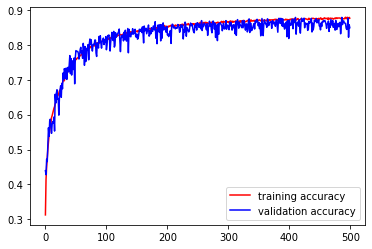

In [74]:
import matplotlib.pyplot as plt
plt.plot(model_info.history['accuracy'],'r')
plt.plot(model_info.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

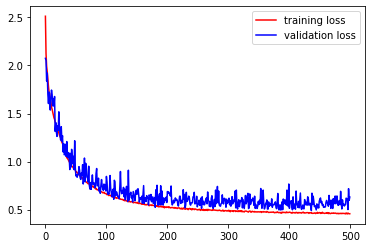

In [75]:
plt.plot(model_info.history['loss'],'r')
plt.plot(model_info.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [76]:
predictions = model.predict_classes(X_test)

In [78]:
import numpy as np
y_test = np.argmax(Y_test, axis=1)

In [100]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1
X_test_mis = X_test.astype('uint8')

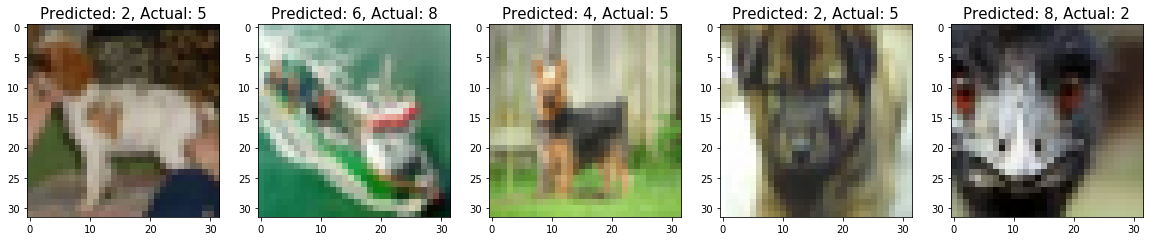

In [101]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(X_test_mis[badIndex])
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], y_test[badIndex]), fontsize = 15)

In [105]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns
# we can also use a confusion matrix to visualize the performance of a classification model
cm = confusion_matrix(y_test, predictions)
# use this line to normalize the confusion matrix to show percentages instead of counts
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


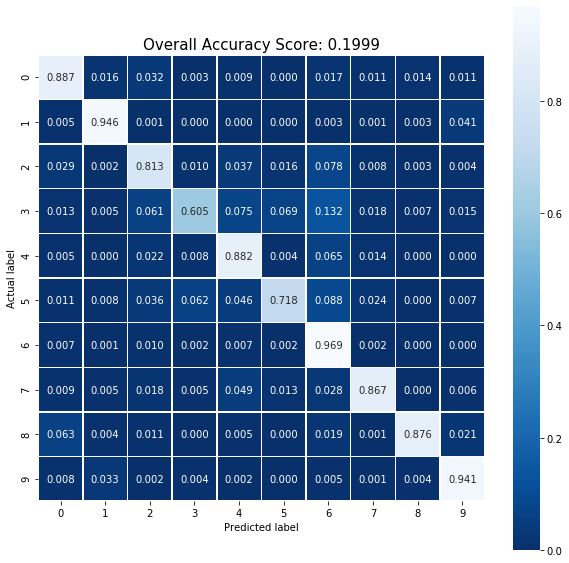

In [106]:
# plot this matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Overall Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show();

## arch 8 - Image augmentation (3) && Dropout && L2 Regularization (0.001) + 100

In [21]:
from tensorflow.keras import regularizers

In [22]:
model = Sequential()

# 32,32
model.add(Convolution2D(16,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(32,32,3), padding='same'))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(32,(3,3), activation='relu' , kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())

# 28,28
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# # 14,14
model.add(Convolution2D(24,1, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# 14,14
model.add(Convolution2D(64,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001), padding='same'))
model.add(BatchNormalization())

# 12, 12
model.add(Convolution2D(128,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 1, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

model.add(Convolution2D(256,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Convolution2D(10, 4, kernel_regularizer=regularizers.l2(0.001),))

model.add(Flatten())
model.add(Activation('softmax'))


In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 30, 30, 32)        4640      
_________________________________________________________________
batch_normalization_11 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 15, 15, 24)       

In [24]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    horizontal_flip=True,
    zoom_range=0.15,
    width_shift_range=0.2,
)
batch_size = 128
model_info = model.fit_generator(
    datagen.flow(X_train, Y_train, batch_size=batch_size),
    steps_per_epoch=X_train.shape[0]//batch_size,
    epochs=100,
    validation_data=(X_test, Y_test),
)

Epoch 1/100
390/390 [==============================] - 120s 309ms/step - loss: 2.5538 - accuracy: 0.3071 - val_loss: 2.0853 - val_accuracy: 0.3887
Epoch 2/100
390/390 [==============================] - 118s 304ms/step - loss: 2.1681 - accuracy: 0.4074 - val_loss: 1.9890 - val_accuracy: 0.4336
Epoch 3/100
390/390 [==============================] - 119s 305ms/step - loss: 1.9720 - accuracy: 0.4598 - val_loss: 1.9428 - val_accuracy: 0.4925
Epoch 4/100
390/390 [==============================] - 118s 303ms/step - loss: 1.8753 - accuracy: 0.4912 - val_loss: 1.7150 - val_accuracy: 0.5308
Epoch 5/100
390/390 [==============================] - 119s 304ms/step - loss: 1.8099 - accuracy: 0.5174 - val_loss: 1.6847 - val_accuracy: 0.5331
Epoch 6/100
390/390 [==============================] - 135s 346ms/step - loss: 1.7283 - accuracy: 0.5387 - val_loss: 1.9488 - val_accuracy: 0.4691
Epoch 7/100
390/390 [==============================] - 139s 356ms/step - loss: 1.6892 - accuracy: 0.5496 - val_loss: 1

390/390 [==============================] - 118s 302ms/step - loss: 0.8353 - accuracy: 0.7762 - val_loss: 0.9203 - val_accuracy: 0.7670
Epoch 57/100
390/390 [==============================] - 118s 302ms/step - loss: 0.8351 - accuracy: 0.7761 - val_loss: 0.9264 - val_accuracy: 0.7694
Epoch 58/100
390/390 [==============================] - 118s 302ms/step - loss: 0.8267 - accuracy: 0.7802 - val_loss: 1.0451 - val_accuracy: 0.7350
Epoch 59/100
390/390 [==============================] - 118s 302ms/step - loss: 0.8162 - accuracy: 0.7818 - val_loss: 0.9241 - val_accuracy: 0.7697
Epoch 60/100
390/390 [==============================] - 118s 302ms/step - loss: 0.8067 - accuracy: 0.7829 - val_loss: 0.8482 - val_accuracy: 0.7902
Epoch 61/100
390/390 [==============================] - 118s 302ms/step - loss: 0.8094 - accuracy: 0.7813 - val_loss: 0.9646 - val_accuracy: 0.7632
Epoch 62/100
390/390 [==============================] - 118s 303ms/step - loss: 0.8007 - accuracy: 0.7851 - val_loss: 0.8615 

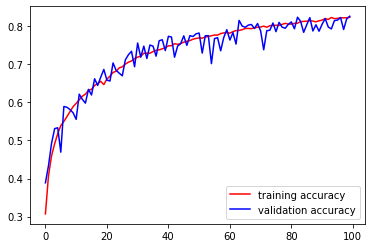

In [26]:
import matplotlib.pyplot as plt
plt.plot(model_info.history['accuracy'],'r')
plt.plot(model_info.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

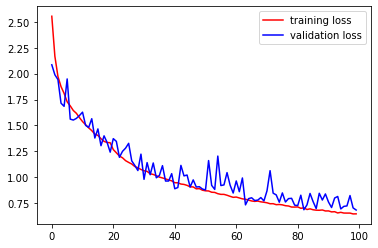

In [27]:
plt.plot(model_info.history['loss'],'r')
plt.plot(model_info.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [28]:
predictions = model.predict_classes(X_test)

score = accuracy_score(y_test, predictions)
score

0.8256

In [29]:
import numpy as np
y_test = np.argmax(Y_test, axis=1)

In [30]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1
X_test_mis = X_test.astype('uint8')

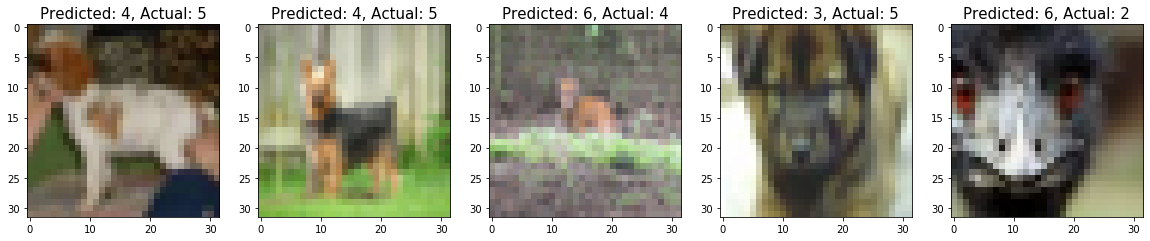

In [31]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(X_test_mis[badIndex])
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], y_test[badIndex]), fontsize = 15)

In [32]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns
# we can also use a confusion matrix to visualize the performance of a classification model
cm = confusion_matrix(y_test, predictions)
# use this line to normalize the confusion matrix to show percentages instead of counts
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


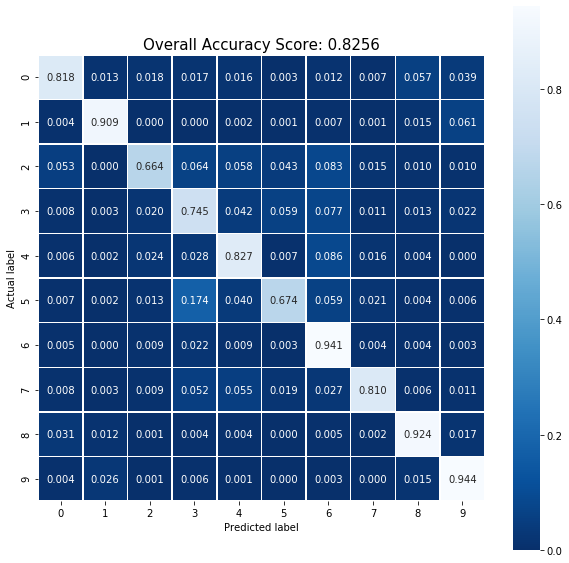

In [33]:
# plot this matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Overall Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show();

## arch 9 - Image augmentation (4) && Dropout && L2 Regularization (0.001) + 100

In [34]:
from tensorflow.keras import regularizers

In [35]:
model = Sequential()

# 32,32
model.add(Convolution2D(16,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(32,32,3), padding='same'))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(32,(3,3), activation='relu' , kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())

# 28,28
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# # 14,14
model.add(Convolution2D(24,1, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# 14,14
model.add(Convolution2D(64,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001), padding='same'))
model.add(BatchNormalization())

# 12, 12
model.add(Convolution2D(128,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 1, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

model.add(Convolution2D(256,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Convolution2D(10, 4, kernel_regularizer=regularizers.l2(0.001),))

model.add(Flatten())
model.add(Activation('softmax'))


In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 30, 30, 32)        4640      
_________________________________________________________________
batch_normalization_16 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 15, 15, 24)       

In [37]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
import cv2
cv2.__version__

'4.1.2'

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def blur(img):
    return (cv2.blur(img,(5,5)))

datagen = ImageDataGenerator(
    horizontal_flip=True,
    zoom_range=0.15,
    width_shift_range=0.2,
    preprocessing_function=blur
)
batch_size = 128
model_info = model.fit_generator(
    datagen.flow(X_train, Y_train, batch_size=batch_size),
    steps_per_epoch=X_train.shape[0]//batch_size,
    epochs=100,
    validation_data=(X_test, Y_test),
)

Epoch 1/100
390/390 [==============================] - 118s 302ms/step - loss: 2.5711 - accuracy: 0.2938 - val_loss: 2.2227 - val_accuracy: 0.3432
Epoch 2/100
390/390 [==============================] - 118s 302ms/step - loss: 2.1990 - accuracy: 0.3814 - val_loss: 2.4200 - val_accuracy: 0.3766
Epoch 3/100
390/390 [==============================] - 117s 301ms/step - loss: 2.0846 - accuracy: 0.4159 - val_loss: 2.3473 - val_accuracy: 0.3809
Epoch 4/100
390/390 [==============================] - 118s 302ms/step - loss: 2.0336 - accuracy: 0.4319 - val_loss: 2.7686 - val_accuracy: 0.3284
Epoch 5/100
390/390 [==============================] - 118s 302ms/step - loss: 1.9642 - accuracy: 0.4516 - val_loss: 2.3601 - val_accuracy: 0.3798
Epoch 6/100
390/390 [==============================] - 118s 301ms/step - loss: 1.9115 - accuracy: 0.4639 - val_loss: 2.7888 - val_accuracy: 0.3218
Epoch 7/100
390/390 [==============================] - 118s 302ms/step - loss: 1.8925 - accuracy: 0.4739 - val_loss: 2

390/390 [==============================] - 117s 301ms/step - loss: 1.0786 - accuracy: 0.6901 - val_loss: 5.3472 - val_accuracy: 0.2644
Epoch 57/100
390/390 [==============================] - 118s 302ms/step - loss: 1.0721 - accuracy: 0.6920 - val_loss: 5.3385 - val_accuracy: 0.2832
Epoch 58/100
390/390 [==============================] - 118s 301ms/step - loss: 1.0697 - accuracy: 0.6901 - val_loss: 3.6670 - val_accuracy: 0.3484
Epoch 59/100
390/390 [==============================] - 118s 301ms/step - loss: 1.0618 - accuracy: 0.6939 - val_loss: 5.9222 - val_accuracy: 0.2583
Epoch 60/100
390/390 [==============================] - 118s 302ms/step - loss: 1.0493 - accuracy: 0.6981 - val_loss: 5.1913 - val_accuracy: 0.2836
Epoch 61/100
390/390 [==============================] - 118s 302ms/step - loss: 1.0397 - accuracy: 0.7002 - val_loss: 3.9664 - val_accuracy: 0.3465
Epoch 62/100
390/390 [==============================] - 118s 302ms/step - loss: 1.0432 - accuracy: 0.6991 - val_loss: 5.3545 

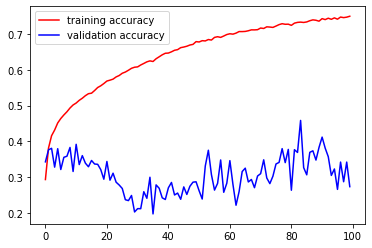

In [40]:
import matplotlib.pyplot as plt
plt.plot(model_info.history['accuracy'],'r')
plt.plot(model_info.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

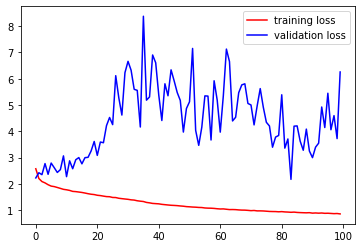

In [41]:
plt.plot(model_info.history['loss'],'r')
plt.plot(model_info.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [42]:
predictions = model.predict_classes(X_test)

score = accuracy_score(y_test, predictions)
score

0.274

In [43]:
import numpy as np
y_test = np.argmax(Y_test, axis=1)

In [44]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1
X_test_mis = X_test.astype('uint8')

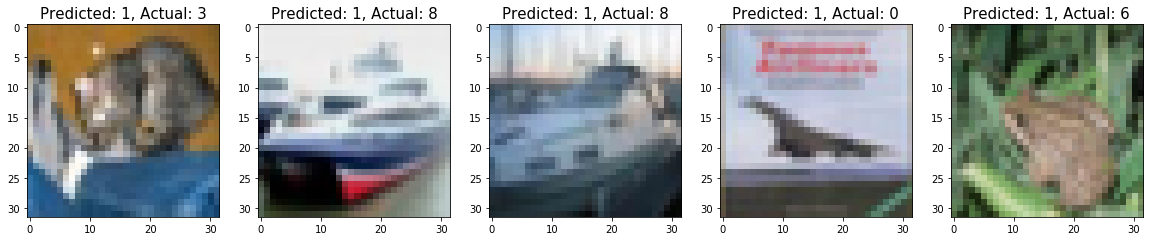

In [45]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(X_test_mis[badIndex])
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], y_test[badIndex]), fontsize = 15)

In [46]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns
# we can also use a confusion matrix to visualize the performance of a classification model
cm = confusion_matrix(y_test, predictions)
# use this line to normalize the confusion matrix to show percentages instead of counts
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

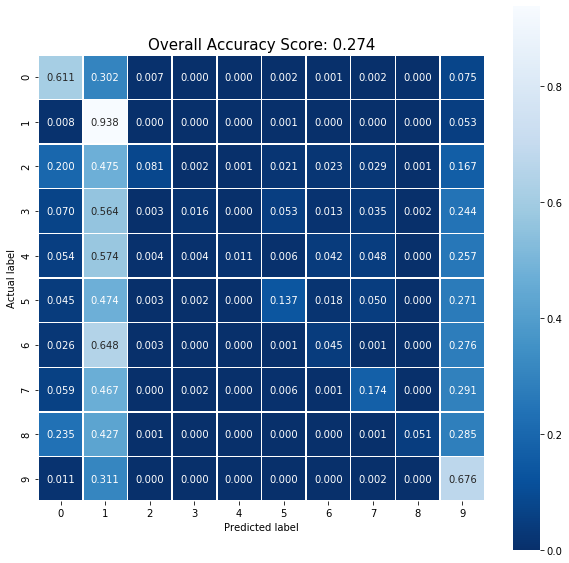

In [47]:
# plot this matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Overall Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show();

## arch 10 - Image augmentation (3) && Dropout && L2 Regularization (0.001) + 100

In [48]:
from tensorflow.keras import regularizers

In [49]:
model = Sequential()

# 32,32
model.add(Convolution2D(16,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(32,32,3), padding='same'))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(32,(3,3), activation='relu' , kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())

# 28,28
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# # 14,14
model.add(Convolution2D(24,1, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# 14,14
model.add(Convolution2D(64,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001), padding='same'))
model.add(BatchNormalization())

# 12, 12
model.add(Convolution2D(128,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 1, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

model.add(Convolution2D(256,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Convolution2D(10, 4, kernel_regularizer=regularizers.l2(0.001),))

model.add(Flatten())
model.add(Activation('softmax'))


In [50]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_20 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 30, 30, 32)        4640      
_________________________________________________________________
batch_normalization_21 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 15, 15, 24)       

In [51]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    horizontal_flip=True,
    zoom_range=0.15,
)
batch_size = 128
model_info = model.fit_generator(
    datagen.flow(X_train, Y_train, batch_size=batch_size),
    steps_per_epoch=X_train.shape[0]//batch_size,
    epochs=100,
    validation_data=(X_test, Y_test),
)

Epoch 1/100
390/390 [==============================] - 118s 302ms/step - loss: 2.4585 - accuracy: 0.3268 - val_loss: 2.0457 - val_accuracy: 0.4012
Epoch 2/100
390/390 [==============================] - 117s 301ms/step - loss: 2.0595 - accuracy: 0.4383 - val_loss: 2.0701 - val_accuracy: 0.4379
Epoch 3/100
390/390 [==============================] - 117s 301ms/step - loss: 1.9016 - accuracy: 0.4891 - val_loss: 1.9561 - val_accuracy: 0.4618
Epoch 4/100
390/390 [==============================] - 118s 302ms/step - loss: 1.7829 - accuracy: 0.5246 - val_loss: 1.6139 - val_accuracy: 0.5568
Epoch 5/100
390/390 [==============================] - 118s 302ms/step - loss: 1.7202 - accuracy: 0.5494 - val_loss: 1.5847 - val_accuracy: 0.5621
Epoch 6/100
390/390 [==============================] - 118s 302ms/step - loss: 1.6418 - accuracy: 0.5745 - val_loss: 1.5054 - val_accuracy: 0.6032
Epoch 7/100
390/390 [==============================] - 117s 301ms/step - loss: 1.5808 - accuracy: 0.5926 - val_loss: 1

390/390 [==============================] - 117s 301ms/step - loss: 0.7444 - accuracy: 0.8079 - val_loss: 0.8584 - val_accuracy: 0.7809
Epoch 57/100
390/390 [==============================] - 118s 302ms/step - loss: 0.7412 - accuracy: 0.8072 - val_loss: 0.7896 - val_accuracy: 0.8053
Epoch 58/100
390/390 [==============================] - 117s 301ms/step - loss: 0.7296 - accuracy: 0.8133 - val_loss: 0.7774 - val_accuracy: 0.8040
Epoch 59/100
390/390 [==============================] - 117s 301ms/step - loss: 0.7247 - accuracy: 0.8121 - val_loss: 0.7694 - val_accuracy: 0.8132
Epoch 60/100
390/390 [==============================] - 118s 302ms/step - loss: 0.7225 - accuracy: 0.8148 - val_loss: 0.8269 - val_accuracy: 0.7924
Epoch 61/100
390/390 [==============================] - 117s 301ms/step - loss: 0.7234 - accuracy: 0.8126 - val_loss: 0.7513 - val_accuracy: 0.8140
Epoch 62/100
390/390 [==============================] - 118s 302ms/step - loss: 0.7157 - accuracy: 0.8146 - val_loss: 0.7354 

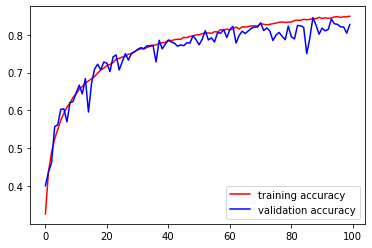

In [53]:
import matplotlib.pyplot as plt
plt.plot(model_info.history['accuracy'],'r')
plt.plot(model_info.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

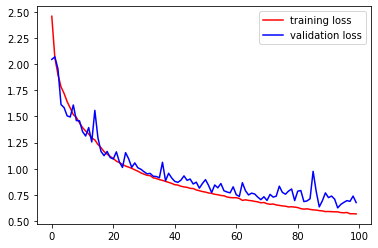

In [54]:
plt.plot(model_info.history['loss'],'r')
plt.plot(model_info.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [55]:
predictions = model.predict_classes(X_test)

score = accuracy_score(y_test, predictions)
score

0.827

In [56]:
import numpy as np
y_test = np.argmax(Y_test, axis=1)

In [57]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1
X_test_mis = X_test.astype('uint8')

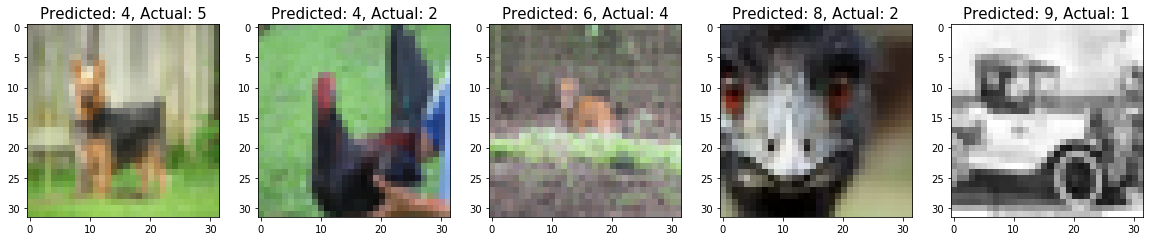

In [58]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(X_test_mis[badIndex])
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], y_test[badIndex]), fontsize = 15)

In [59]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns
# we can also use a confusion matrix to visualize the performance of a classification model
cm = confusion_matrix(y_test, predictions)
# use this line to normalize the confusion matrix to show percentages instead of counts
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


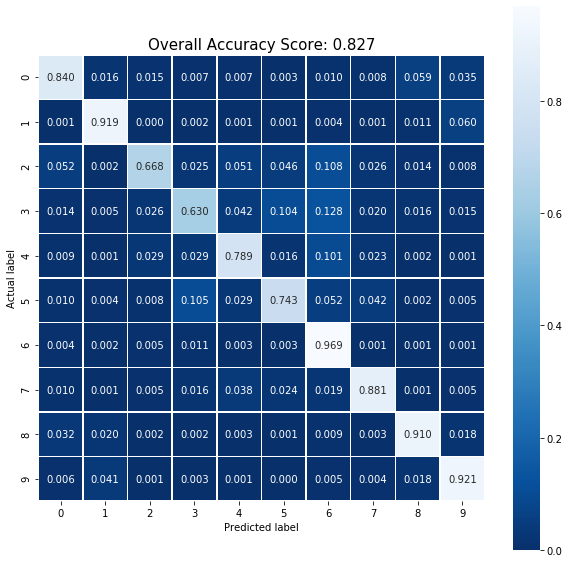

In [60]:
# plot this matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Overall Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show();